### Random Forest

We realized that the relationship between predictors and the target could be more complex than we thought, so using Random Forest can provide better performance.

For our Random Forest model, we made some modifications to the code. We imported RandomForestClassifier from sklearn.ensemble and classification_report from sklearn.metrics to evaluate the performance of the model. We iterated over different values of max_depth from 10 to 20 and computed the ROC AUC score by predicting the probabilities using predict_proba and then calculating the area under the ROC curve using roc_auc_score.

We also predicted the test data using predict and generated a classification report to assess the precision, recall, F1-score, and support for each class. We stored the ROC AUC scores and classification reports in lists for further analysis.

The optimal ROC AUC score was determined by selecting the maximum value from the computed scores. To visualize the performance of the random forest models, we created a plot of the ROC AUC scores for different values of max_depth. We also plotted a decision tree from the random forest model with max_depth equal to 5, which achieved the highest ROC AUC score.

The classification reports provide insights into the performance of the random forest models for each value of max_depth. They include metrics such as precision, recall, F1-score, and support for each class, allowing us to evaluate the model's effectiveness in predicting different classes.

By examining the ROC AUC scores and classification reports, we can select the optimal max_depth that yields the best performance for our random forest model in terms of ROC AUC and classification metrics.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
from numpy import mean, std
from matplotlib import pyplot
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

def get_data():
    url = 'https://raw.githubusercontent.com/COGS118A/Group009-SP23/main/clean_data.csv'
    data = pd.read_csv(url)
    data = data.dropna()
    print(data.shape)
    return data

In [19]:
# Defining arrays for all of the scores
auc_score = []
classification_reports = []

for i in range(10, 20):
    # Train a random forest classifier model on the training data
    forestModel = RandomForestClassifier(max_depth=i)
    forestModel.fit(X_train, y_train)

    # Predict probabilities and calculate the ROC AUC score
    y_pred_proba = forestModel.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_score.append(auc)
    print("Model {} ROC AUC: {:.4f}".format(i-9, auc))

    # Predict and evaluate the model
    y_pred = forestModel.predict(X_test)
    report = classification_report(y_test, y_pred)
    classification_reports.append(report)

    print("Model {} Classification Report:\n{}".format(i, report))
    print("-" * 60)

print()
print("Optimal ROC AUC: {:.4f}".format(max(auc_score)))


Model 1 ROC AUC: 0.8276
Model 10 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.37      0.52      1211
           1       0.72      0.96      0.82      2083

    accuracy                           0.74      3294
   macro avg       0.78      0.67      0.67      3294
weighted avg       0.76      0.74      0.71      3294

------------------------------------------------------------
Model 2 ROC AUC: 0.8328
Model 11 Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.41      0.55      1211
           1       0.73      0.94      0.83      2083

    accuracy                           0.75      3294
   macro avg       0.77      0.68      0.69      3294
weighted avg       0.76      0.75      0.72      3294

------------------------------------------------------------
Model 3 ROC AUC: 0.8343
Model 12 Classification Report:
              precision    recall  f1-score   support

 

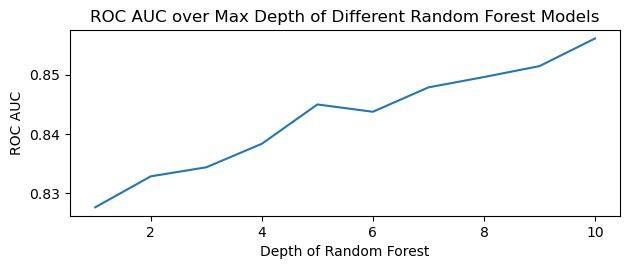

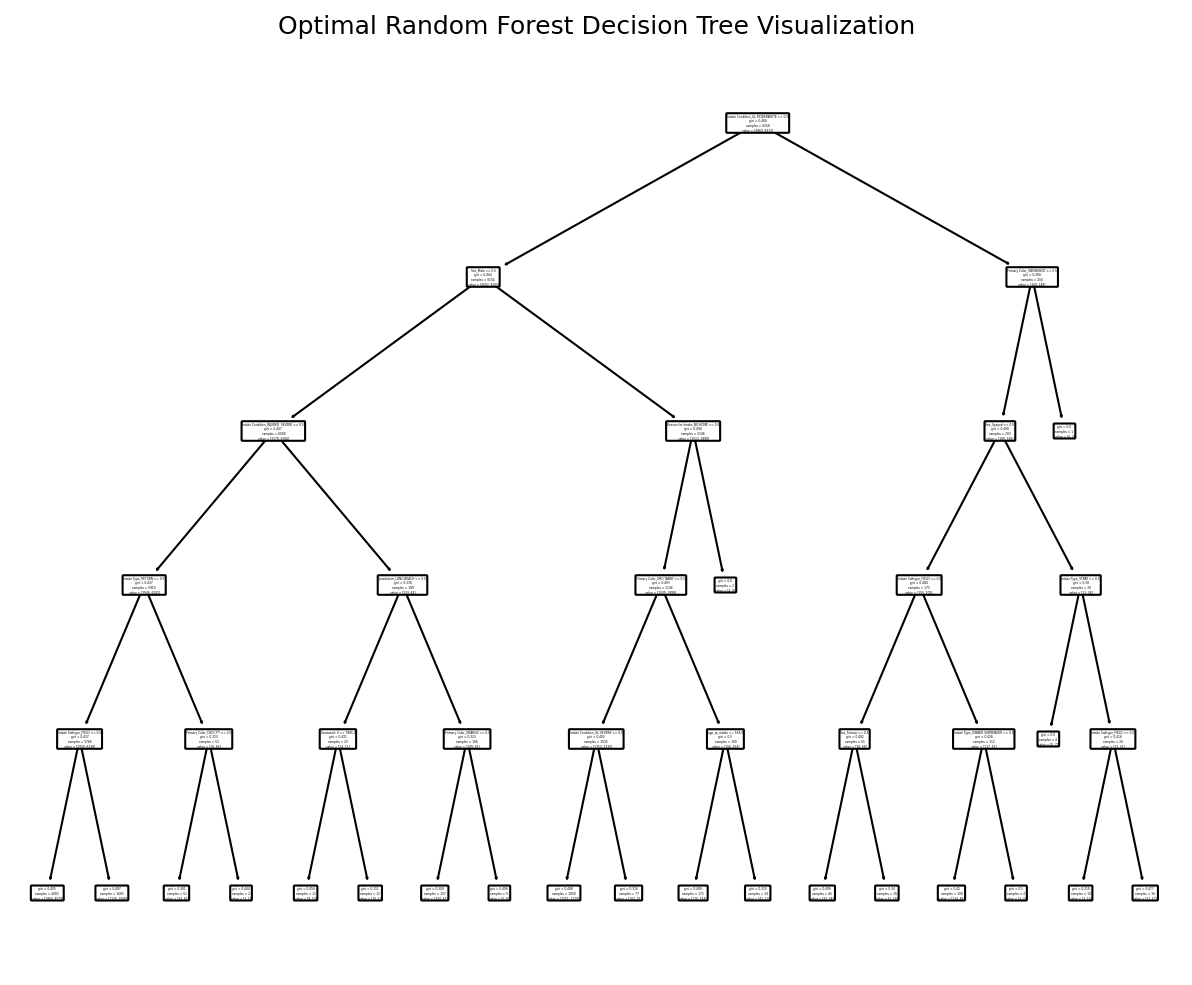

In [22]:
# Creating plots of the ROC AUC of Max Depth of Different Random Forest Models
auc_array = np.array(auc_score)
x = np.arange(1, 11)

auc_plot = plt.subplot(2, 1, 1)
plt.plot(x, auc_array)
auc_plot.set_title("ROC AUC over Max Depth of Different Random Forest Models")
plt.xlabel("Depth of Random Forest")
plt.ylabel("ROC AUC")
plt.tight_layout()

forest5Model = RandomForestClassifier(max_depth=5)
forest5Model.fit(X_train, y_train)

# Plot a decision tree based on tree depth that resulted in the highest ROC AUC
plt.figure(figsize=(10, 8), dpi=150)
plot_tree(forest5Model.estimators_[0], feature_names=X.columns, rounded=True)
plt.title("Optimal Random Forest Decision Tree Visualization")

# Show the plot
plt.show()

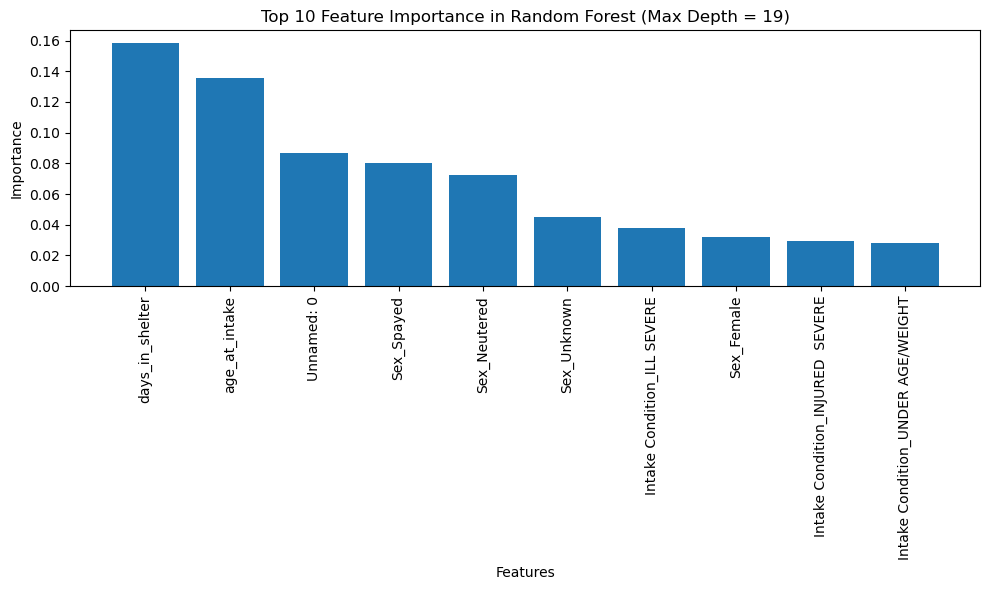

In [24]:
model = RandomForestClassifier(max_depth=19)
model.fit(X_train, y_train)

importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_indices]

feature_names = X.columns
sorted_feature_names = feature_names[sorted_indices]
sorted_importances = importances[sorted_indices][:10]
sorted_feature_names = feature_names[sorted_indices][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importance in Random Forest (Max Depth = 19)')
plt.tight_layout()

plt.show()